# CommonLit Readability Prize <a id="top"></a>

Competition link: https://www.kaggle.com/c/commonlitreadabilityprize/overview

**Table of contents**
- [Import data](#import)
- [Missing values](#missing-values)
- [Correlation Studies](#correlation-studies)
- [Readability tests](#readability-tests)
- [Modelling](#modelling)

**Files**
- `train.csv` - the training set
- `test.csv` - the test set
- `sample_submission.csv` - a sample submission file in the correct format

**Columns**
- `id` - unique ID for excerpt
- `url_legal` - URL of source - this is blank in the test set.
- `license` - license of source material - this is blank in the test set.
- `excerpt` - text to predict reading ease of
- `target` - reading ease
- `standard_error` - measure of spread of scores among multiple raters for each excerpt. Not included for test data.

**Performance metrics**
- Root Mean Squared Error (RMSE): $$RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^n \left(\frac{y_i - \hat{y}_i}{\sigma_i}\right)}$$
- $y_i$: ground truth target score of $i$-th text
- $\hat{y}_i$: predicted target score of $i$-th text
- $\sigma_i$: standard error of the $i$-th text
- $n$: number of text in test set

In [172]:
!pip install textstat -q

You should consider upgrading via the 'c:\users\tay.yq.xtraman\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [175]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# readability tests
import textstat

# Download Wordnet through NLTK in python console:
import re

import nltk
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer 

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tay.yq.XTRAMAN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# Init the Wordnet Lemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

## Import data <a id="import"></a>

[Back to top](#top)

In [3]:
train_df = pd.read_csv("train.csv")
train_df

,id,url_legal,license,excerpt,target,standard_error
0,c12129c31,NaN,NaN,When the young people returned to the ballroom...,-0.340259,0.464009
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805
2,b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676
3,dd1000b26,NaN,NaN,And outside before the palace a great garden w...,-1.054013,0.450007
4,37c1b32fb,NaN,NaN,Once upon a time there were Three Bears who li...,0.247197,0.510845
...,...,...,...,...,...,...
2829,25ca8f498,https://sites.ehe.osu.edu/beyondpenguins/files...,CC BY-SA 3.0,When you think of dinosaurs and where they liv...,1.711390,0.646900
2830,2c26db523,https://en.wikibooks.org/wiki/Wikijunior:The_E...,CC BY-SA 3.0,So what is a solid? Solids are usually hard be...,0.189476,0.535648
2831,cd19e2350,https://en.wikibooks.org/wiki/Wikijunior:The_E...,CC BY-SA 3.0,The second state of matter we will discuss is ...,0.255209,0.483866
2832,15e2e9e7a,https://en.wikibooks.org/wiki/Geometry_for_Ele...,CC BY-SA 3.0,Solids are shapes that you can actually touch....,-0.215279,0.514128


In [4]:
test_df = pd.read_csv("test.csv")
test_df

,id,url_legal,license,excerpt
0,c0f722661,NaN,NaN,My hope lay in Jack's promise that he would ke...
1,f0953f0a5,NaN,NaN,Dotty continued to go to Mrs. Gray's every nig...
2,0df072751,NaN,NaN,It was a bright and cheerful scene that greete...
3,04caf4e0c,https://en.wikipedia.org/wiki/Cell_division,CC BY-SA 3.0,Cell division is the process by which a parent...
4,0e63f8bea,https://en.wikipedia.org/wiki/Debugging,CC BY-SA 3.0,Debugging is the process of finding and resolv...
5,12537fe78,NaN,NaN,"To explain transitivity, let us look first at ..."
6,965e592c0,https://www.africanstorybook.org/#,CC BY 4.0,Milka and John are playing in the garden. Her ...


In [5]:
sample_submission_df = pd.read_csv("sample_submission.csv")
sample_submission_df

,id,target
0,c0f722661,0.0
1,f0953f0a5,0.0
2,0df072751,0.0
3,04caf4e0c,0.0
4,0e63f8bea,0.0
5,12537fe78,0.0
6,965e592c0,0.0


## Missing values <a id="missing-values"></a>

[Back to top](#top)

In [6]:
print("Missing values for training data:\n", train_df.isna().sum())
print()
print("Missing values for test data:\n", test_df.isna().sum())

Missing values for training data:
 id                   0
url_legal         2004
license           2004
excerpt              0
target               0
standard_error       0
dtype: int64

Missing values for test data:
 id           0
url_legal    4
license      4
excerpt      0
dtype: int64


## Correlation Studies <a id="correlation-studies"></a>
    
[Back to top](#top)

In [21]:
def word_count(text: str) -> int:
    alphabetical_text = re.sub("[^(a-z)(A-Z) ]", "", text)
    word_tokens = nltk.word_tokenize(alphabetical_text)
    return len(word_tokens)

def sent_count(text: str) -> int:
    sent_tokens = nltk.sent_tokenize(text)
    return len(sent_tokens)

In [23]:
word_count_train = list(train_df.excerpt.apply(word_count))
sent_count_train = list(train_df.excerpt.apply(sent_count))

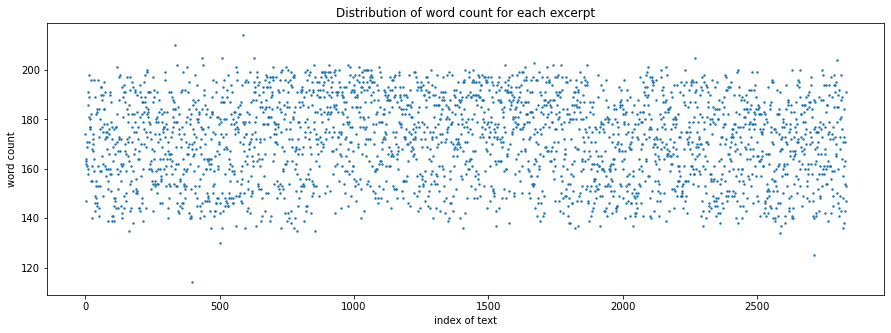

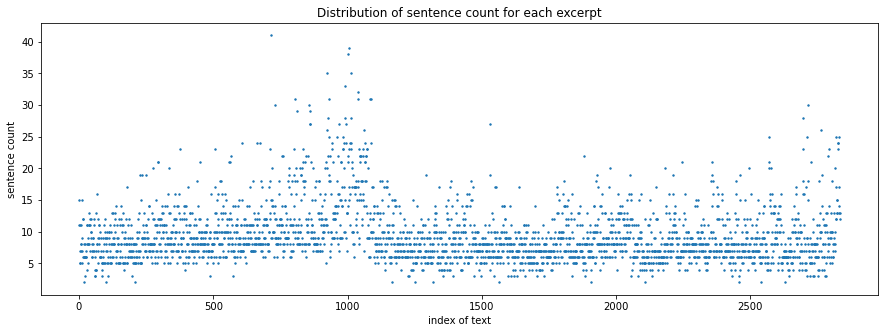

In [24]:
plt.figure(figsize=(15,5))
plt.scatter(x=[i for i in range(len(word_count_train))],
            y=word_count_train,
            s=2)
plt.xlabel("index of text")
plt.ylabel("word count")
plt.title("Distribution of word count for each excerpt")
plt.show()

plt.figure(figsize=(15,5))
plt.scatter(x=[i for i in range(len(sent_count_train))],
            y=sent_count_train,
            s=2)
plt.xlabel("index of text")
plt.ylabel("sentence count")
plt.title("Distribution of sentence count for each excerpt")
plt.show()

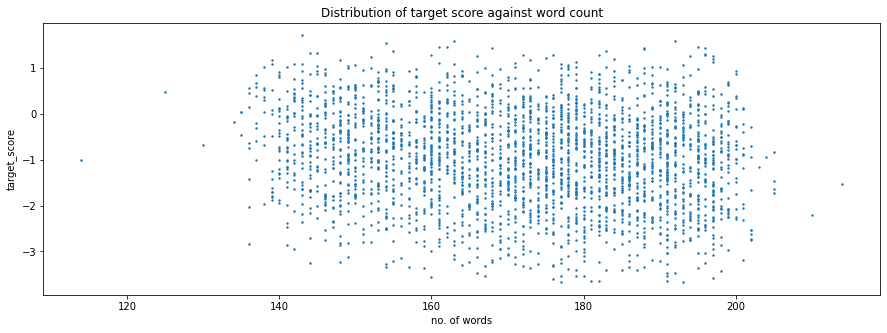

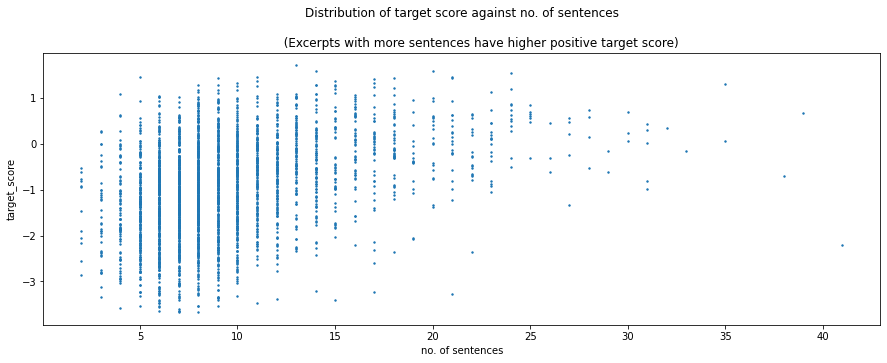

In [171]:
sorted_index = np.argsort(word_count_train)

plt.figure(figsize=(15,5))
plt.scatter(x=np.array(word_count_train)[sorted_index],
            y=np.array(train_df.target)[sorted_index],
            s=2)

plt.xlabel("no. of words")
plt.ylabel("target_score")
plt.title("Distribution of target score against word count")
plt.show()

sorted_index = np.argsort(sent_count_train)

plt.figure(figsize=(15,5))
plt.scatter(x=np.array(sent_count_train)[sorted_index],
            y=np.array(train_df.target)[sorted_index],
            s=2)

plt.xlabel("no. of sentences")
plt.ylabel("target_score")
plt.title("""Distribution of target score against no. of sentences
          
          (Excerpts with more sentences have higher positive target score)""")
plt.show()

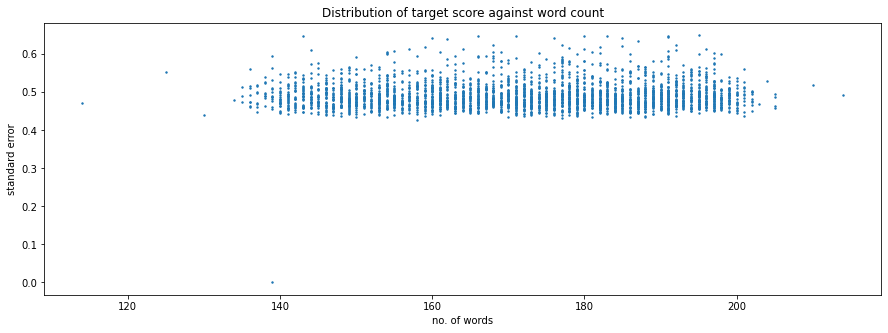

In [27]:
sorted_index = np.argsort(word_count_train)

plt.figure(figsize=(15,5))
plt.scatter(x=np.array(word_count_train)[sorted_index],
            y=np.array(train_df.standard_error)[sorted_index],
            s=2)

plt.xlabel("no. of words")
plt.ylabel("standard error")
plt.title("Distribution of standard error against word count")
plt.show()

sorted_index = np.argsort(word_count_train)

plt.figure(figsize=(15,5))
plt.scatter(x=np.array(word_count_train)[sorted_index],
            y=np.array(train_df.standard_error)[sorted_index],
            s=2)

plt.xlabel("no. of words")
plt.ylabel("standard error")
plt.title("Distribution of standard error against word count")
plt.show()

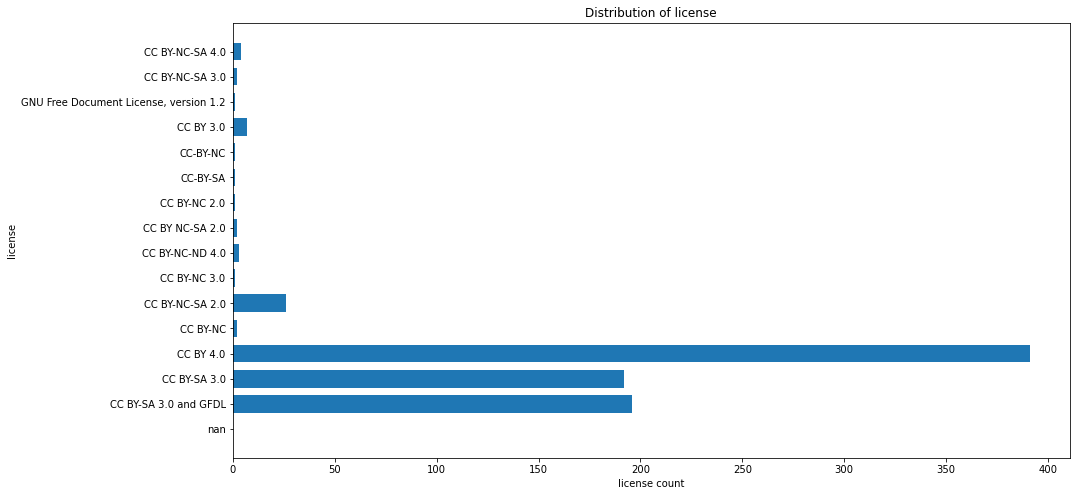

In [54]:
license_count = {}

for license in train_df.license.unique():
    license_count[license] = len(train_df.loc[train_df.license == license])
    
plt.figure(figsize=(15,8))
plt.barh(y=range(len(license_count)),
         width=list(license_count.values()),
         height=0.7,
         tick_label=list(license_count.keys()))

plt.xlabel("license count")
plt.ylabel("license")
plt.title("Distribution of license")
plt.show()

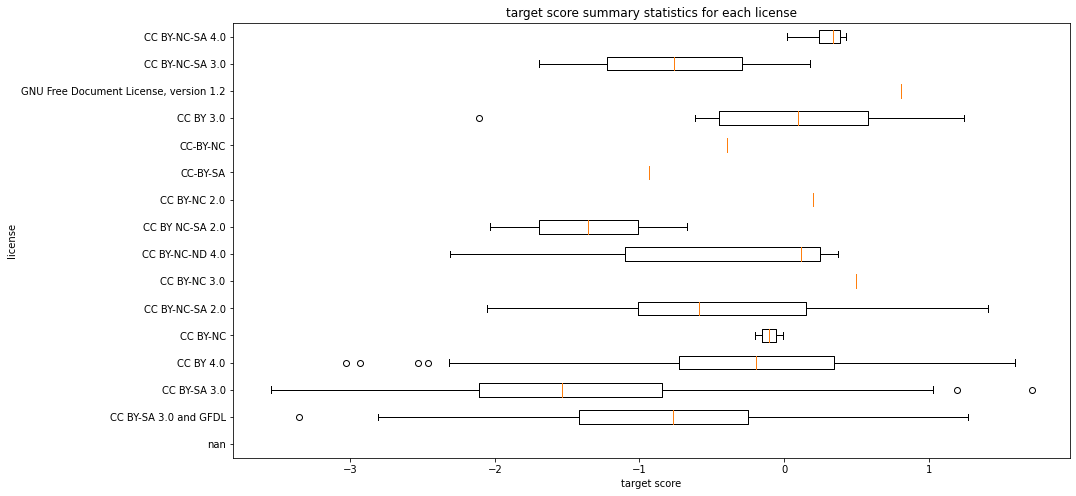

In [151]:
target_scores = []

for license in train_df.license.unique():
    target_scores.append(train_df.loc[train_df.license == license, "target"])
    
plt.figure(figsize=(15,8))
plt.boxplot(x=target_scores,
            labels=list(train_df.license.unique()),
            vert=False)


plt.xlabel("target score")
plt.ylabel("license")
plt.title("target score summary statistics for each license")
plt.show()

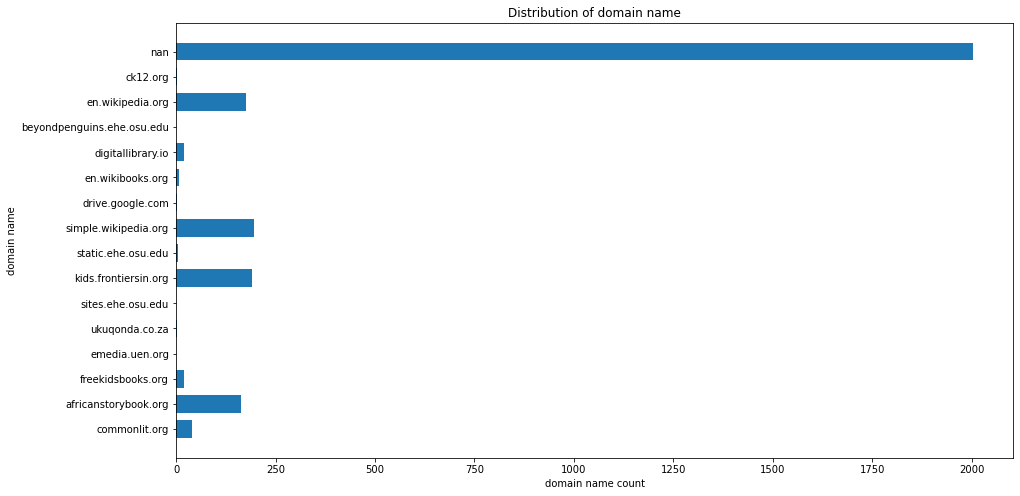

In [157]:
domain_name_count = {}

# obtain the unique domain names
# domain name can start with "https://", "http://", "https://www." or "http://www."
unique_domain_names = list(set([re.findall(r"https*://(?:www.)*([^/]+)/", x)[0] for x in train_df.url_legal.dropna()]))

for domain_name in unique_domain_names:
    # check if domain name is present in the url
    domain_name_count[domain_name] = train_df.url_legal.apply(lambda x: domain_name in x if type(x) is str else False).sum()

domain_name_count[np.nan] = train_df.url_legal.isna().sum()
    
plt.figure(figsize=(15,8))
plt.barh(y=range(len(domain_name_count)),
         width=list(domain_name_count.values()),
         height=0.7,
         tick_label=list(domain_name_count.keys()))

plt.xlabel("domain name count")
plt.ylabel("domain name")
plt.title("Distribution of domain name")
plt.show()

In [166]:
len(list(domain_name_count.keys())), len(target_scores)

(16, 15)

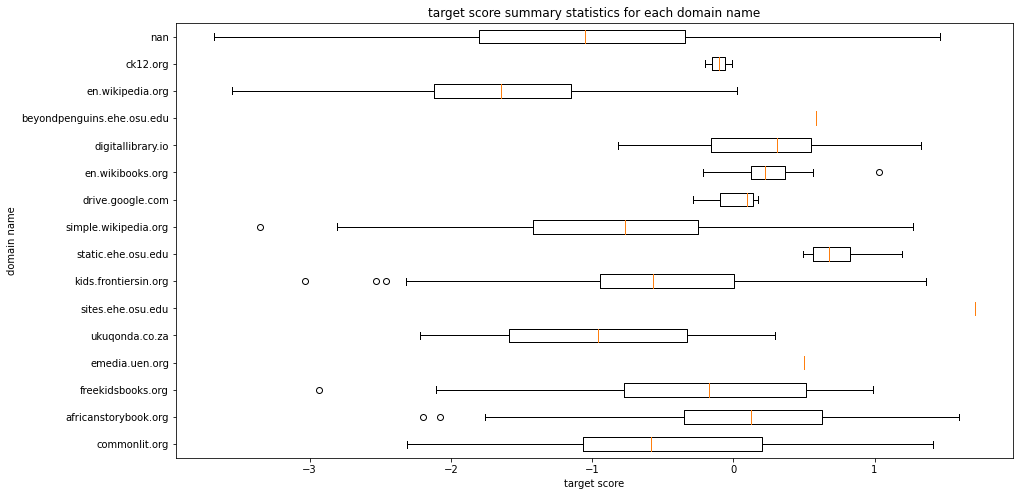

In [167]:
target_scores = []

for domain_name in unique_domain_names:
    # check if domain name is present in the url
    domain_name_indicator = train_df.url_legal.apply(lambda x: domain_name in x if type(x) is str else False)
    target_scores.append(list(train_df.loc[domain_name_indicator, "target"]))

domain_name_indicator = train_df.url_legal.isna()
target_scores.append(list(train_df.loc[domain_name_indicator, "target"]))
    
plt.figure(figsize=(15,8))
plt.boxplot(x=target_scores,
            labels=unique_domain_names + [np.nan],
            vert=False)


plt.xlabel("target score")
plt.ylabel("domain name")
plt.title("target score summary statistics for each domain name")
plt.show()

## Readability tests <a id="readability-tests"></a>

`textstat` is a library used to calculate statistics from text. It came in super handy for calculating scores of various readability tests!

- `flesch_re`: The Flesch Reading Ease formula
- `flesch_kg`: The Flesch-Kincaid Grade Level
- `fog_scale`: The Fog Scale (Gunning FOG Formula)
- `automated_r`: Automated Readability Index
- `coleman`: The Coleman-Liau Index
- `linsear`: Linsear Write Formula
- `text_standard`: Readability Consensus based upon all the above tests

[Back to top](#top)

In [176]:
textstat.flesch_reading_ease(train_df.excerpt[0])

80.31

In [180]:
textstat.text_standard(train_df.excerpt[10]),\
train_df.excerpt[10]

('20th and 21st grade',
 "It was believed by the principal men of Virginia that Talbot's sympathies were with the revolted colonies; but the influence of his mother, to whom he had been accustomed to defer, had hitherto proved sufficient to prevent him from openly declaring himself. His visit to England, and the delightful reception he had met with there, had weakened somewhat the ties which bound him to his native country, and he found himself in a state of indecision as humiliating as it was painful. Lord Dunmore and Colonel Wilton had each made great efforts to enlist his support, on account of his wealth and position and high personal qualities. It was hinted by one that the ancient barony of the Talbots would be revived by the king; and the gratitude of a free and grateful country, with the consciousness of having materially aided in acquiring that independence which should be the birthright of every Englishman, was eloquently portrayed by the other. When to the last plea was adde

## Modelling